In [3]:
!pip install requests

In [23]:
import requests
from PIL import Image
import hashlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [18]:
url = 'https://cdn.trixoli.com/hokkaido-feature.png'
r = requests.get(url, stream=True).raw

In [19]:
img = Image.open(r)
img.show()
img.save('src.png')

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpawflmw5x.PNG'


In [20]:
BUF_SIZE = 1024
with open('src.png', 'rb') as sf, open('dst.png', 'wb') as df:
    while True:
        data = sf.read(BUF_SIZE)
        if not data:
            break
        df.write(data)

In [24]:
sha_src = hashlib.sha256()
sha_dst = hashlib.sha256()

with open('src.png', 'rb') as sf, open('dst.png', 'rb') as df:
    sha_src.update(sf.read())
    sha_dst.update(df.read())

print("src.png's hash is {}".format(sha_src.hexdigest()))
print(f"dst.png's hash is {sha_dst.hexdigest()}")

src.png's hash is 3fe3f1942929d588739258c41a75b139b69e244dafe875ac5a54d7621d1c1c45
dst.png's hash is 3fe3f1942929d588739258c41a75b139b69e244dafe875ac5a54d7621d1c1c45


In [50]:
dst_img = mpimg.imread('dst.png')
print(dst_img)

[[[0.20392157 0.17254902 0.1764706  1.        ]
  [0.23137255 0.20784314 0.21960784 1.        ]
  [0.28235295 0.19215687 0.21960784 1.        ]
  ...
  [0.5411765  0.5764706  0.69803923 1.        ]
  [0.5411765  0.5764706  0.69803923 1.        ]
  [0.5411765  0.5764706  0.69803923 1.        ]]

 [[0.23137255 0.20784314 0.21960784 1.        ]
  [0.24313726 0.1764706  0.2784314  1.        ]
  [0.30588236 0.22745098 0.27450982 1.        ]
  ...
  [0.5411765  0.5764706  0.69803923 1.        ]
  [0.5411765  0.5764706  0.69803923 1.        ]
  [0.5411765  0.5764706  0.69803923 1.        ]]

 [[0.24313726 0.1764706  0.2784314  1.        ]
  [0.24313726 0.1764706  0.2784314  1.        ]
  [0.24313726 0.1764706  0.2784314  1.        ]
  ...
  [0.58431375 0.62352943 0.7254902  1.        ]
  [0.5411765  0.5764706  0.69803923 1.        ]
  [0.58431375 0.62352943 0.7254902  1.        ]]

 ...

 [[0.7764706  0.6        0.27450982 1.        ]
  [0.627451   0.47058824 0.16470589 1.        ]
  [0.54901

In [86]:
pseudo_img = dst_img[:,1,1]
print(pseudo_img)

[0.20784314 0.1764706  0.1764706  0.17254902 0.14509805 0.1764706
 0.20784314 0.20784314 0.20784314 0.2        0.25882354 0.20784314
 0.15294118 0.15294118 0.20784314 0.2        0.2        0.25882354
 0.23921569 0.28627452 0.25490198 0.20784314 0.23137255 0.23137255
 0.25490198 0.23137255 0.23137255 0.17254902 0.14901961 0.08235294
 0.08235294 0.05490196 0.05490196 0.05490196 0.05490196 0.05490196
 0.14901961 0.08235294 0.05490196 0.05490196 0.05490196 0.05490196
 0.05490196 0.05490196 0.08235294 0.08235294 0.08235294 0.08235294
 0.08235294 0.08235294 0.10196079 0.15294118 0.14509805 0.19215687
 0.23529412 0.38039216 0.4392157  0.4392157  0.40784314 0.40784314
 0.40784314 0.4745098  0.4392157  0.4392157  0.34509805 0.34509805
 0.32156864 0.20784314 0.2        0.28627452 0.2784314  0.23921569
 0.28627452 0.28627452 0.25882354 0.28627452 0.34901962 0.16470589
 0.17254902 0.20784314 0.2509804  0.17254902 0.09019608 0.20784314
 0.2784314  0.34509805 0.28627452 0.20784314 0.28627452 0.30588

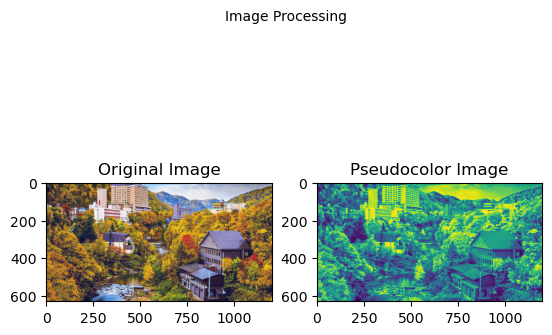

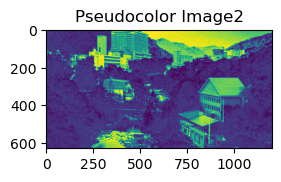

In [83]:
plt.suptitle('Image Processing', fontsize=10)
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(mpimg.imread('src.png'))

plt.subplot(122)
plt.title('Pseudocolor Image')
dst_img = mpimg.imread('dst.png')
pseudo_img = dst_img[:,:,0]
plt.imshow(pseudo_img)
plt.show()

plt.subplot(221)
plt.title('Pseudocolor Image2')
dst_img = mpimg.imread('dst.png')
pseudo_img = dst_img[:,:,2]
plt.imshow(pseudo_img)
plt.show()